# LEVEL-1: Task1- Data Exploration and Preprocessing

a. Explore the dataset and identify the number of rows and columns.

b. Check for missing values in each column and handle them accordingly.

c. Perform data type conversion if necessary.

d. Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\senap\Downloads\Cognifyz\Dataset .csv")

In [3]:
#Identify the no. of Rows and Columns
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 9551
Columns : 21


In [4]:
#Checking for Duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [5]:
#Checking for Missing Values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Insights: Cuisines column has 9 missing values

In [6]:
#Filling the missing values with unknown
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [7]:
#Rechecking for Missing Values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# Checking for Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

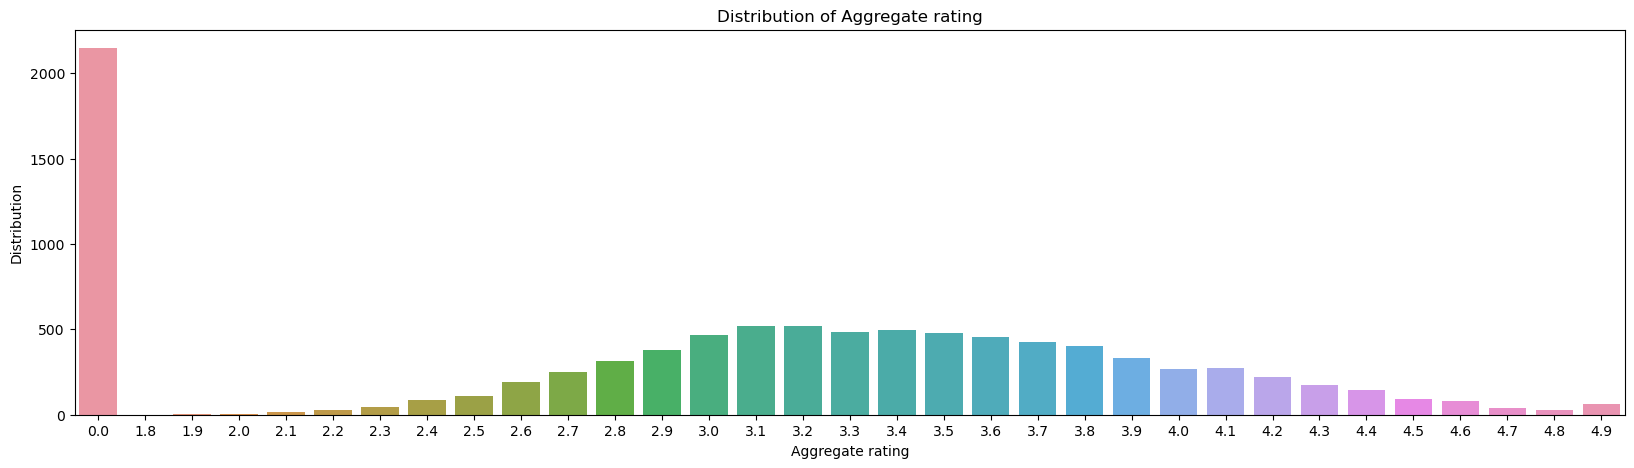

In [9]:
#Analyzing the Target Variable Distribution
plt.figure(figsize = (20,5))
sns.countplot(x = df['Aggregate rating'])
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Distribution')
plt.show()

Insights: Aggregate rating between 0 and 2 is less

In [10]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

Insights: 
The distribution between rating is uneven.
The distributions of aggregate ratings shows a peak at 3.2

# Task2 - Descriptive Analysis
a. Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

b. Explore the distribution of categorical variables like "Country Code", "City" and "Cuisines".

c. Identify the top cuisines and cities with the highest no. of restaurants.

In [11]:
#Statistical measures for all numerical columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
#Segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!= 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print("numerical_columns: ", numerical_columns)
print("categorical_columns: ", categorical_columns)

numerical_columns:  Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')
categorical_columns:  Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [13]:
df["Country Code"].value_counts().sort_index()

1      8652
14       24
30       60
37        4
94       21
148      40
162      22
166      20
184      20
189      60
191      20
208      34
214      60
215      80
216     434
Name: Country Code, dtype: int64

In [14]:
df["City"].value_counts().sort_index()

Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: City, Length: 141, dtype: int64

In [15]:
df["Cuisines"].value_counts().sort_index()

Afghani                                      4
Afghani, Mughlai, Chinese                    1
Afghani, North Indian                        1
Afghani, North Indian, Pakistani, Arabian    1
African                                      1
                                            ..
Western, Asian, Cafe                         1
Western, Fusion, Fast Food                   1
World Cuisine                                1
World Cuisine, Mexican, Italian              1
World Cuisine, Patisserie, Cafe              1
Name: Cuisines, Length: 1826, dtype: int64

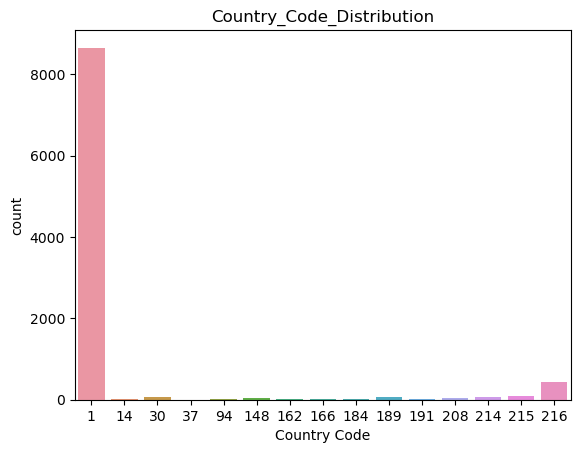

In [16]:
sns.countplot(data = df, x = 'Country Code')
plt.title("Country_Code_Distribution")
plt.show()

In [17]:
top_city = df["City"].value_counts().reset_index()
top_city

,index,City
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
...,...,...
136,Panchkula,1
137,Mc Millan,1
138,Mayfield,1
139,Macedon,1


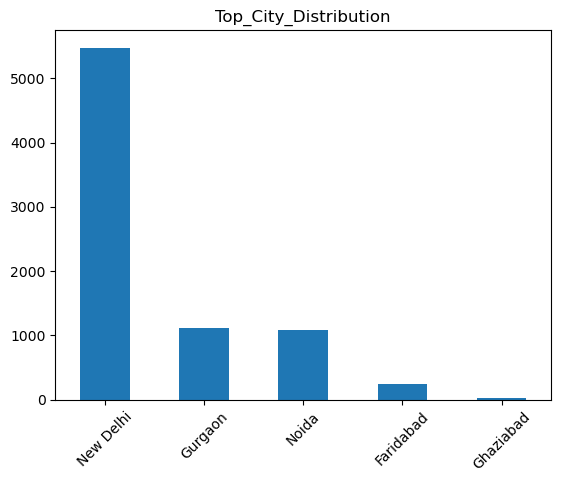

In [18]:
top_city = df["City"].value_counts().head()
top_city.plot(kind = 'bar')
plt.title("Top_City_Distribution")
plt.xticks(rotation = 45)
plt.show()

In [19]:
top_city = df["Cuisines"].value_counts().reset_index()
top_city

,index,Cuisines
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1821,"Bengali, Fast Food",1
1822,"North Indian, Rajasthani, Asian",1
1823,"Chinese, Thai, Malaysian, Indonesian",1
1824,"Bakery, Desserts, North Indian, Bengali, South...",1


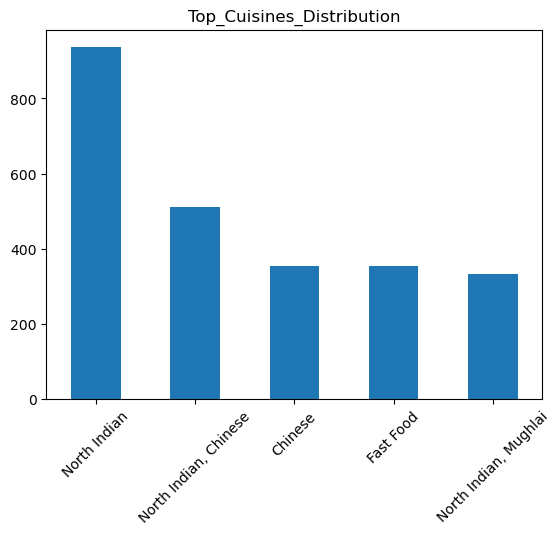

In [20]:
top_city = df["Cuisines"].value_counts().head()
top_city.plot(kind = 'bar')
plt.title("Top_Cuisines_Distribution")
plt.xticks(rotation = 45)
plt.show()

# Task3 - Geospatial Analysis
a. Visualize the locations of restaurants on a map using latitude and longitude information.

b. Analyze the distribution of restaurants across different cities or countries.

c. Determine if there is any correlation between the restaurant's location and it's rating.

In [21]:
import geopandas as gpd

C:\Users\senap\AppData\Local\Temp\ipykernel_31600\2027454006.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


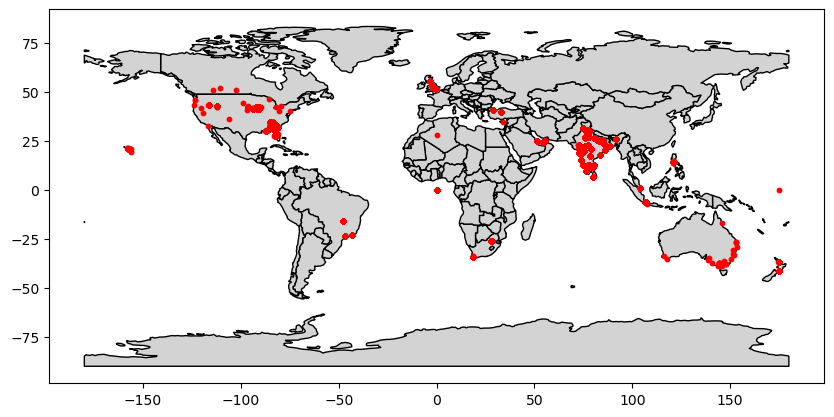

In [22]:
# Assuming 'df' contains longitude and latitude columns
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, color='red', markersize=10)
plt.show()

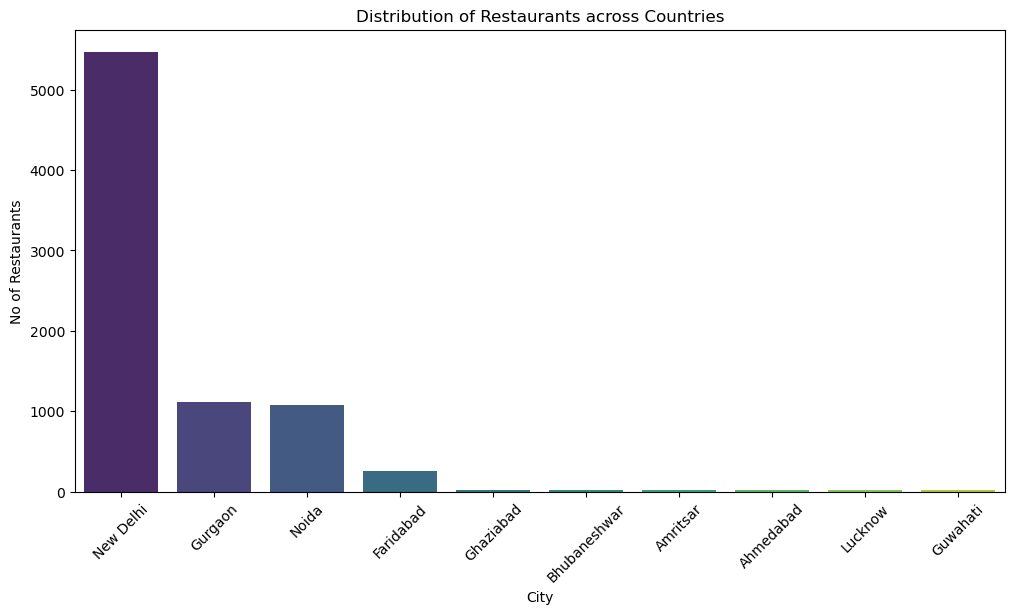

In [23]:
#Analyze the distribution of restaurants across different cities or countries.
city_distribution = df['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(x = 'City', data = df, order = city_distribution.index, palette = "viridis")
plt.title('Distribution of Restaurants across Countries')
plt.xlabel('City')
plt.ylabel('No of Restaurants')
plt.xticks(rotation = 45)
plt.show()

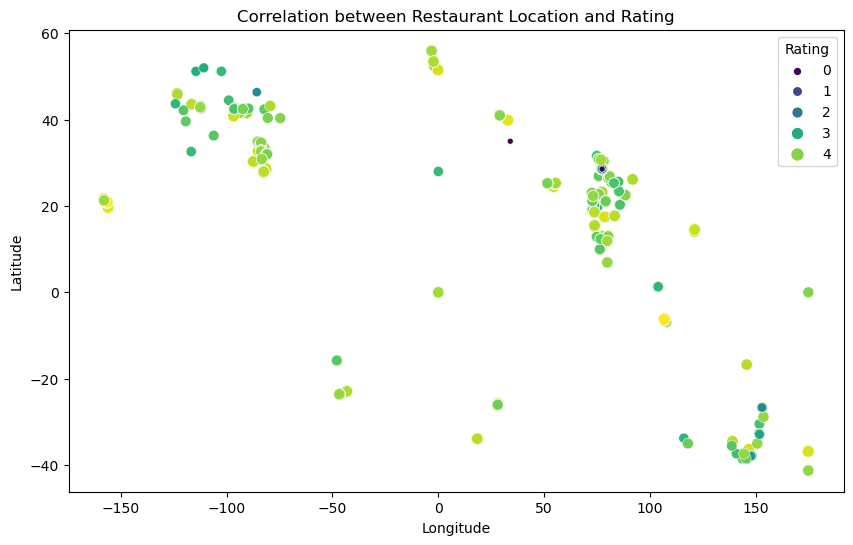

Correlation between Latitude and Longitude: 0.04320728574930197


In [24]:
#Determine if there is any correlation between the restaurant's location and it's rating.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis', size='Aggregate rating')
plt.title('Correlation between Restaurant Location and Rating')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Rating')
plt.show()

correlation_coeff = df[['Latitude', 'Longitude', 'Aggregate rating']].corr().loc['Latitude', 'Longitude']
print('Correlation between Latitude and Longitude:', correlation_coeff)


Insights:
    There are more restaurants in Asia and North America.
    Correlation between Latitude and Longitude: 0.04320728574930197 which is a positive correlation.

# LEVEL-2: Task1 - Table Booking and Online Delivery
a. Determine the percentage of Restaurants that offer table booking and online delivery.

b. Compare the average rating of restaurants with table booking and those without.

c. Analyze the availability of online delivery among restaurants with different price ranges.

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.662234321013504


(0.0, 100.0)

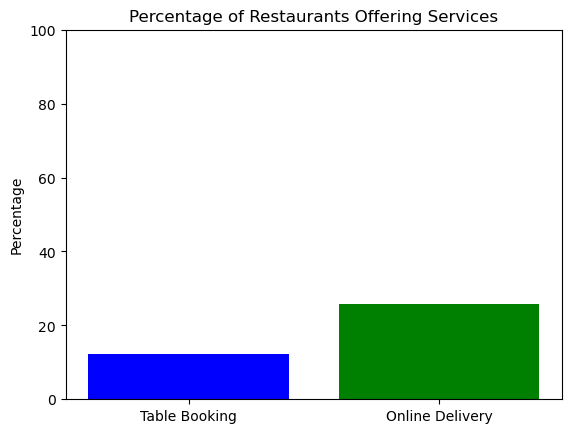

In [25]:
#Determine the percentage of restaurants that offer table booking and online delivery.
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum()/total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum()/total_restaurants * 100

print(f'Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%')
print(f'Percentage of restaurants offering Online Delivery: {online_delivery_percentage}')

# Plotting
labels = ['Table Booking', 'Online Delivery']
percentages = [table_booking_percentage, online_delivery_percentage]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants Offering Services')
plt.ylim(0, 100)

Average rating of restaurants that offer Table Booking:   3.44%
Average rating of restaurants that doesnot offer Table Booking:   2.56%


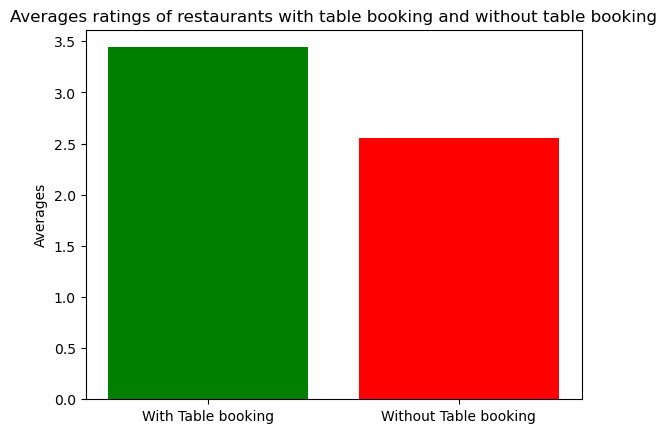

In [26]:
#Compare the average rating of restaurants with table booking and those without
avg_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print('Average rating of restaurants that offer Table Booking: ',f'{avg_rating_with_booking: .2f}%')
print('Average rating of restaurants that doesnot offer Table Booking: ',f'{avg_rating_without_booking: .2f}%')

#Plotting
names = ['With Table booking', 'Without Table booking']
averages = [avg_rating_with_booking, avg_rating_without_booking]
plt.bar(names, averages, color = ['green', 'red'])
plt.ylabel('Averages')
plt.title('Averages ratings of restaurants with table booking and without table booking')
plt.show()

Online Delivery Avaailability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


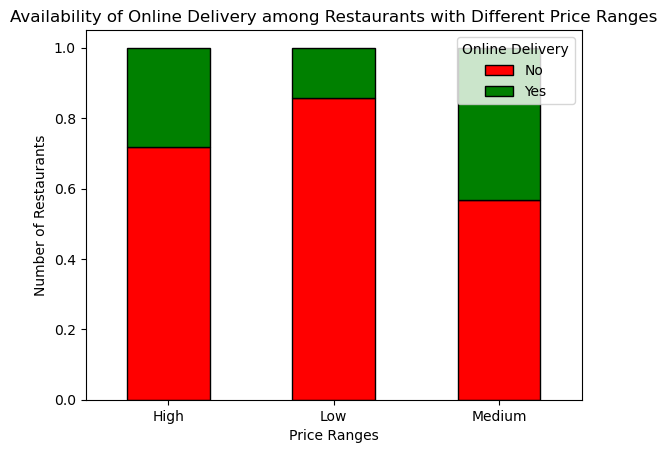

In [27]:
#Availability of Online Delivery
pricerange = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery = df.groupby(pricerange)['Has Online delivery'].value_counts(normalize = True).unstack()

print('Online Delivery Avaailability by Price Range:')
print(online_delivery)

#Plotting
online_delivery.plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')
plt.legend(title='Online Delivery')
plt.title('Availability of Online Delivery among Restaurants with Different Price Ranges')
plt.xlabel('Price Ranges')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0) 
plt.show()

# Task2 - Price Range Analysis
a. Determine the most common price range among all the restaurants.

b. Calculate the average rating for each price range.

c. Identify the color that represents the highest average rating among different price ranges.

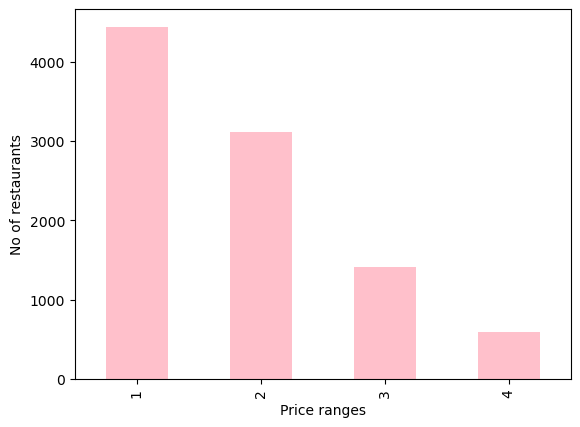

Common price range among all restaurants:  1


In [28]:
#the most common price range among all the restaurants
price_ranges = df['Price range'].value_counts()
price_ranges.plot(kind = 'bar', color = 'pink')
plt.ylabel('No of restaurants')
plt.xlabel('Price ranges')
plt.show()

common_price_range = df['Price range'].mode()[0]
print('Common price range among all restaurants: ', common_price_range)

In [29]:
#average rating for each price range
avgrating = df.groupby('Price range')['Aggregate rating'].mean()
print('Average rating for each price range:')
print(round(avgrating))

Average rating for each price range:
Price range
1    2.0
2    3.0
3    4.0
4    4.0
Name: Aggregate rating, dtype: float64


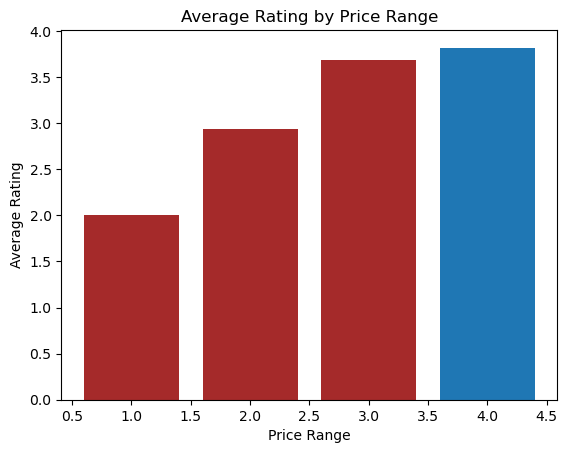

In [30]:
#Identify the color that represents the highest average rating among different price ranges
highest_avg = avgrating.idxmax()
plt.bar(avgrating.index, avgrating, color = 'brown')
plt.bar(highest_avg, avgrating[highest_avg])
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

# Task3 - Feature Engineering
a. Extract additional features from the existing columns, such as the length of the restaurant name or address.

b. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [31]:
#Extract additional features from the existing columns, such as the length of the restaurant name or address
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [32]:
#Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

df = df.drop(['Has Table booking', 'Has Online delivery'], axis = 1)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


# LEVEL-3: Task1 - Prdictive Modelling
a. Build a regression model to predict the aggregate rating of a restaurant based on available features.

b. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

c. Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.
    

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
# regression model to predict the aggregate rating of a restaurant based on available features
x = df[['Average Cost for two', 'Price range', 'Votes']]
y = df[['Aggregate rating']]

In [35]:
#Split the dataset into Train data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Train data: ', X_train.shape, Y_train.shape)
print('Test data: ', X_test.shape, Y_test.shape)

Train data:  (7640, 3) (7640, 1)
Test data:  (1911, 3) (1911, 1)


In [36]:
#Build Regression Model(Linear Regression)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
#Predict aggregate ratings on the test set
y_pred = model.predict(X_test)

In [38]:
#Evaluation
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared = False)
r2 = r2_score(Y_test, y_pred)

print('Mean Squared Error: ', mse )
print('Root Mean Squared Error: ', rmse)
print('r2 score: ', r2)

Mean Squared Error:  1.75993024059484
Root Mean Squared Error:  1.326623624316573
r2 score:  0.22678120947295166


C:\Users\senap\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
#different algorithms (e.g., linear regression, decision trees, random forest)
from sklearn.model_selection import train_test_split
models = {'Linear Regression': LinearRegression(),
         'Decision Tree': DecisionTreeRegressor(random_state = 42),
         'Random Forest': RandomForestRegressor(n_estimators = 100, random_state = 42)}

In [40]:
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared = False)
    r2 = r2_score(Y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'r2': r2}

#Compare model performance.    
print("Regression Model Performance:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"r2: {metrics['r2']:.2f}")
    print("\n")

C:\Users\senap\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\senap\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\senap\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Regression Model Performance:
Model: Linear Regression
MSE: 1.76
RMSE: 1.33
r2: 0.23


Model: Decision Tree
MSE: 0.21
RMSE: 0.46
r2: 0.91


Model: Random Forest
MSE: 0.14
RMSE: 0.38
r2: 0.94




C:\Users\senap\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Insights: Among the three models, Random Forest gives superior prformance:
         
         Low MSE: 0.14
        
         High R-Square : 0.94

# Task2 - Customer Preference Analysis
a. Analyze the relationship between the type of cuisine and the restaurant's rating.

b. Identify the most popular cuisines among customers based on the number of votes.

c. Determine if there are any specific cuisines that tend to receive higher ratings.

In [41]:
#Relationship between the type of cuisine and the restaurant's rating
top_cuisines = df['Cuisines'].value_counts().nlargest(15).index
top_cuisines

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       'Pizza, Fast Food', 'Chinese, Fast Food', 'Mithai, Street Food',
       'South Indian', 'Bakery, Fast Food'],
      dtype='object')

In [42]:
df_filtered = df[df['Cuisines'].isin(top_cuisines)]
df_filtered

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,3,4.4,Green,Very Good,336,12,71,0,0
23,6601005,Caf�� Daniel Briand,30,Bras�_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.882667,-15.777500,Cafe,...,No,1,3.8,Yellow,Good,9,19,48,0,0
24,6600292,Casa do Biscoito Mineiro,30,Bras�_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Bras�_lia",-47.882136,-15.757472,Bakery,...,No,2,3.7,Yellow,Good,11,24,51,0,0
88,17284094,Chick-fil-A,216,Albany,"2703 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219300,31.616000,Fast Food,...,No,1,3.5,Yellow,Good,67,11,32,0,0
93,17284150,House of China Restaurant II,216,Albany,"2526 Dawson Rd Ste A, Albany, GA 31707",Albany,"Albany, Albany",-84.212000,31.610400,Chinese,...,No,1,3.8,Yellow,Good,153,28,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,6003668,Timboo Cafe,208,Ankara,"Kentpark AVM, Kat -1, Mustafa Kemal Mahallesi,...","Kentpark AVM, ��niversiteler, �ankaya","Kentpark AVM, ��niversiteler, �ankaya, Ankara",32.776255,39.908957,Cafe,...,No,3,4.2,Green,Very Good,79,11,92,0,0
9531,6000747,The Bigos,208,Ankara,"Mahallesi, Selanik 2 Caddesi, No 61/A, �ankaya...",K۱z۱lay,"K۱z۱lay, Ankara",32.857917,39.916686,Cafe,...,No,3,3.8,Yellow,Good,123,9,54,0,0
9538,5901782,Starbucks,208,��stanbul,"Bebek Mahallesi, Cevdetpa��a Caddesi, No 30/A,...",Bebek,"Bebek, ��stanbul",29.043734,41.077696,Cafe,...,No,2,4.9,Dark Green,Excellent,1042,9,68,0,0
9543,5916085,Dem Karak�_y,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...",Karak�_y,"Karak�_y, ��stanbul",28.978237,41.024633,Cafe,...,No,2,4.5,Dark Green,Excellent,761,12,84,0,0


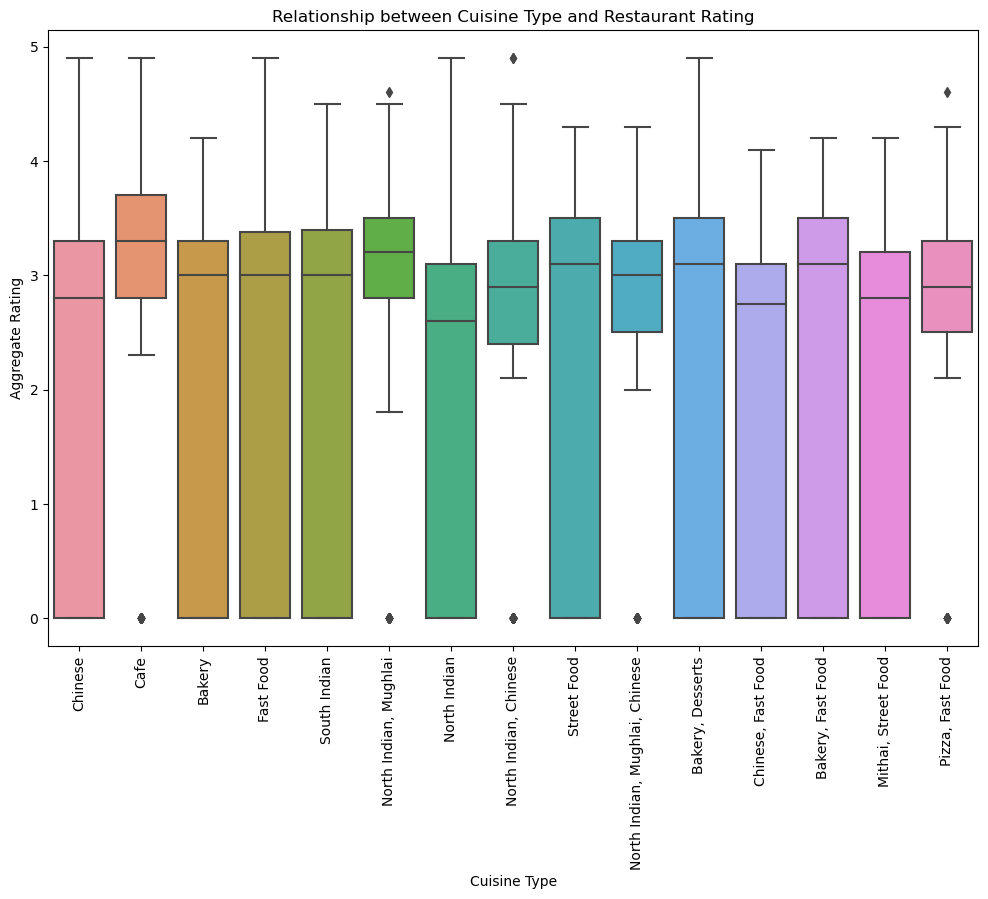

In [43]:
#Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_filtered)
plt.title('Relationship between Cuisine Type and Restaurant Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Insights: North Indian and Chinese cuisines are with more varied ratings.

In [44]:
#Most popular cuisines among customers based on the number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(15)
top_cuisines 

Cuisines
North Indian, Mughlai                         53747
North Indian                                  46241
North Indian, Chinese                         42012
Cafe                                          30657
Chinese                                       21925
North Indian, Mughlai, Chinese                20115
Fast Food                                     17852
South Indian                                  16433
Mughlai, North Indian                         15275
Italian                                       14799
European, Mediterranean, North Indian         12541
Modern Indian                                 12355
Chinese, Thai                                 12354
Pizza                                         11537
Continental, American, Asian, North Indian    11404
Name: Votes, dtype: int64

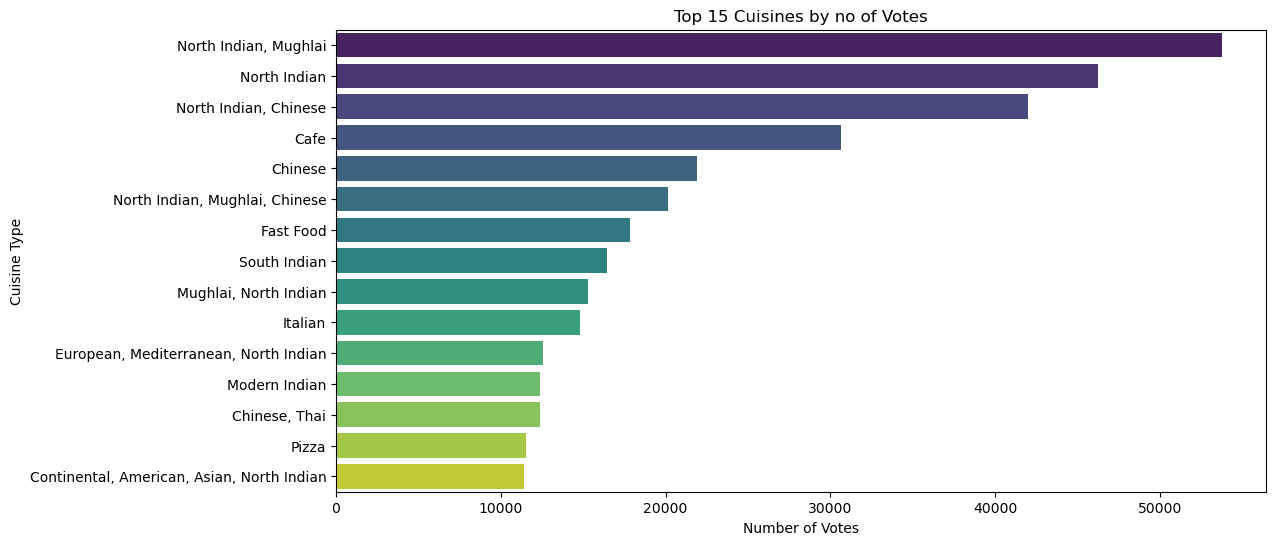

In [45]:
#Plotting
plt.figure(figsize = (12,6))
sns.barplot(x = top_cuisines.values, y = top_cuisines.index, palette = 'viridis')
plt.title('Top 15 Cuisines by no of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine Type')
plt.show()

Insights: Based on number of votes North Indian, Mughlai and Chinese are most popular cuisines

In [46]:
#Specific cuisines that tend to receive higher ratings.
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings

,Cuisines,Aggregate rating
0,Afghani,0.725
1,"Afghani, Mughlai, Chinese",0.000
2,"Afghani, North Indian",0.000
3,"Afghani, North Indian, Pakistani, Arabian",0.000
4,African,4.700
...,...,...
1821,"Western, Asian, Cafe",4.200
1822,"Western, Fusion, Fast Food",3.200
1823,World Cuisine,4.900
1824,"World Cuisine, Mexican, Italian",4.400


In [47]:
cuisine_ratings = cuisine_ratings.sort_values(by = 'Aggregate rating', ascending = False)
cuisine_ratings

,Cuisines,Aggregate rating
683,"Continental, Indian",4.9
169,"BBQ, Breakfast, Southern",4.9
1062,"Italian, Deli",4.9
37,"American, Caribbean, Seafood",4.9
302,"Burger, Bar Food, Steak",4.9
...,...,...
1299,"Nepalese, Tibetan",0.0
1687,"Seafood, Mughlai, North Indian",0.0
1457,"North Indian, Fast Food, Mithai",0.0
1305,"North Eastern, North Indian, Chinese",0.0


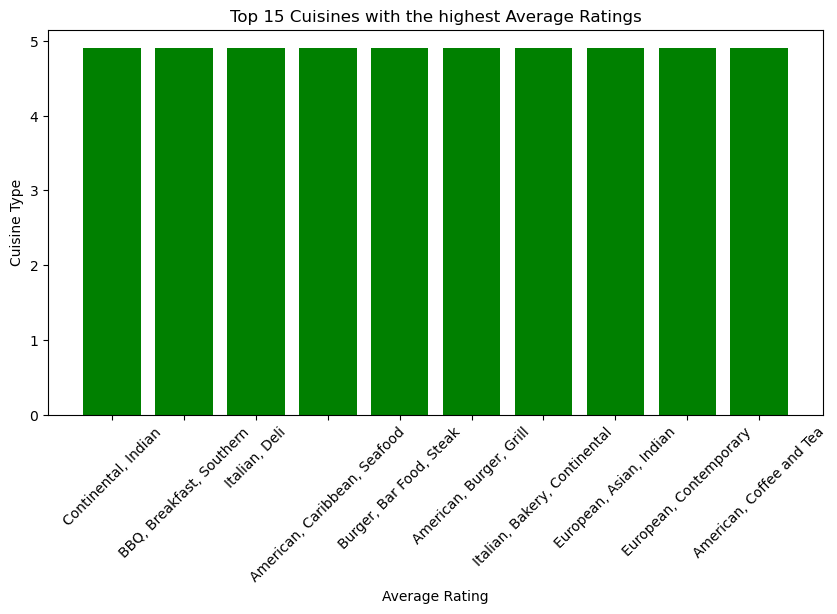

In [48]:
#Plotting 
plt.figure(figsize = (10,5))
plt.bar(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='green')
plt.title('Top 15 Cuisines with the highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.xticks(rotation=45)  
plt.show()

Insights: Based on highest average raing Indian, Southern, Italian, American, Bar Food and European are most popular cuisines.

# Task3 - Data Visualization
a. Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

b. Compare the average ratings of different cuisines or cities using appropriate visualizations.

c. Visualize the relationship between various features and the target to gain insights.

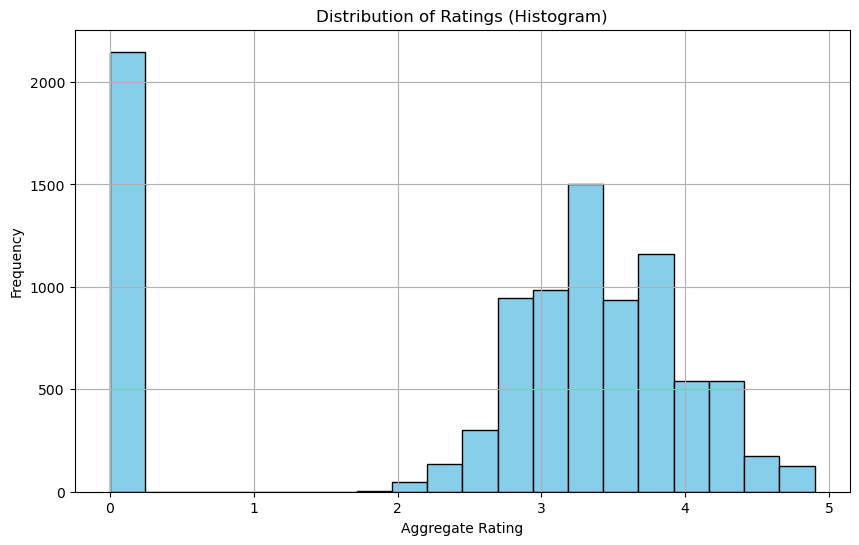

In [51]:
#distribution of ratings using different charts
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings (Histogram)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

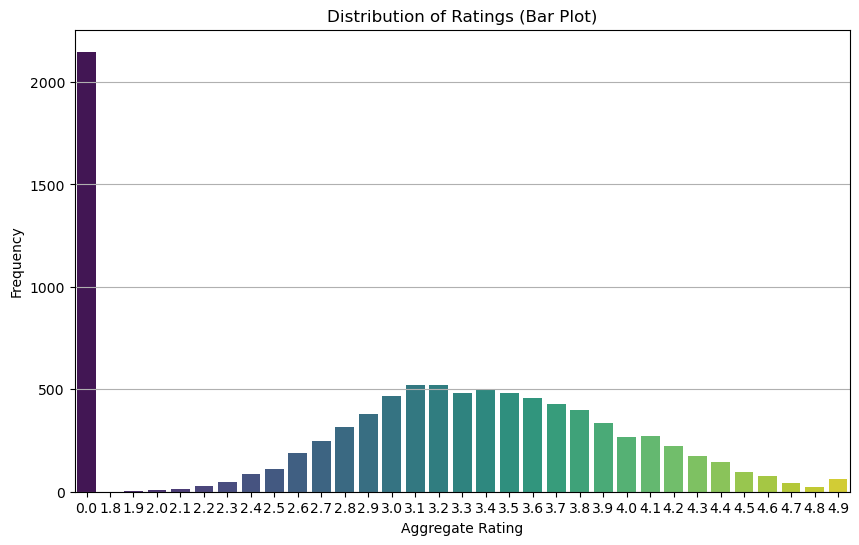

In [52]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df, palette='viridis')
plt.title('Distribution of Ratings (Bar Plot)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

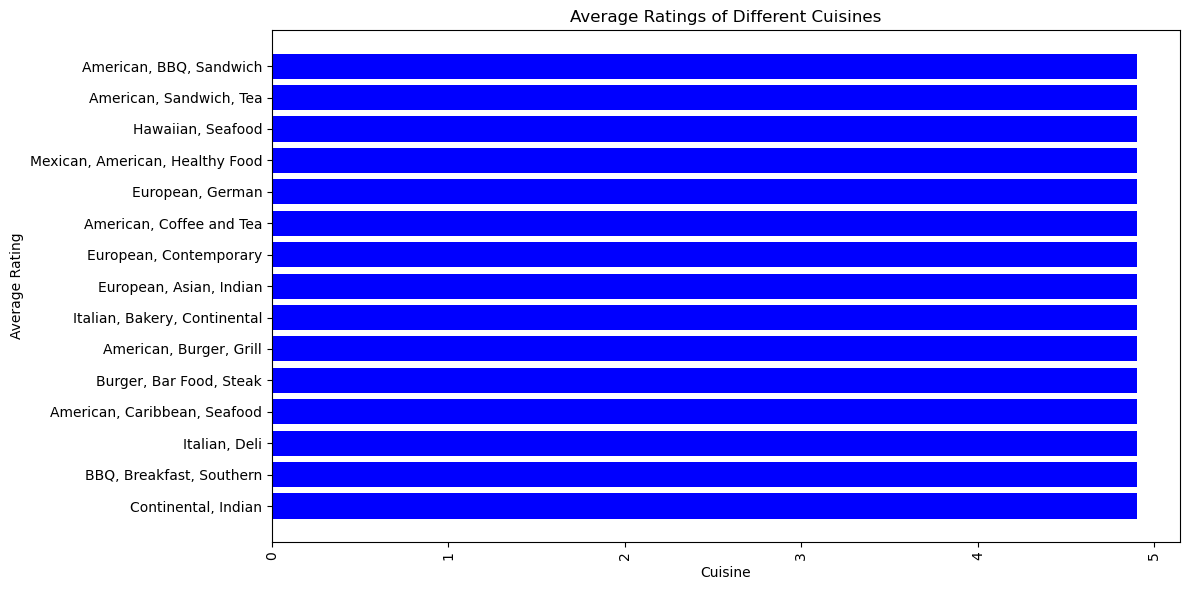

In [55]:
# Comparing average ratings of different cuisines
plt.figure(figsize=(12, 6))
plt.barh(cuisine_ratings['Cuisines'][:15], cuisine_ratings['Aggregate rating'][:15], color = 'blue')
plt.title('Average Ratings of Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\senap\AppData\Local\Temp\ipykernel_31600\2002432343.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = avg_ratings.values[:15], y = avg_ratings.index[:15], ci=None)


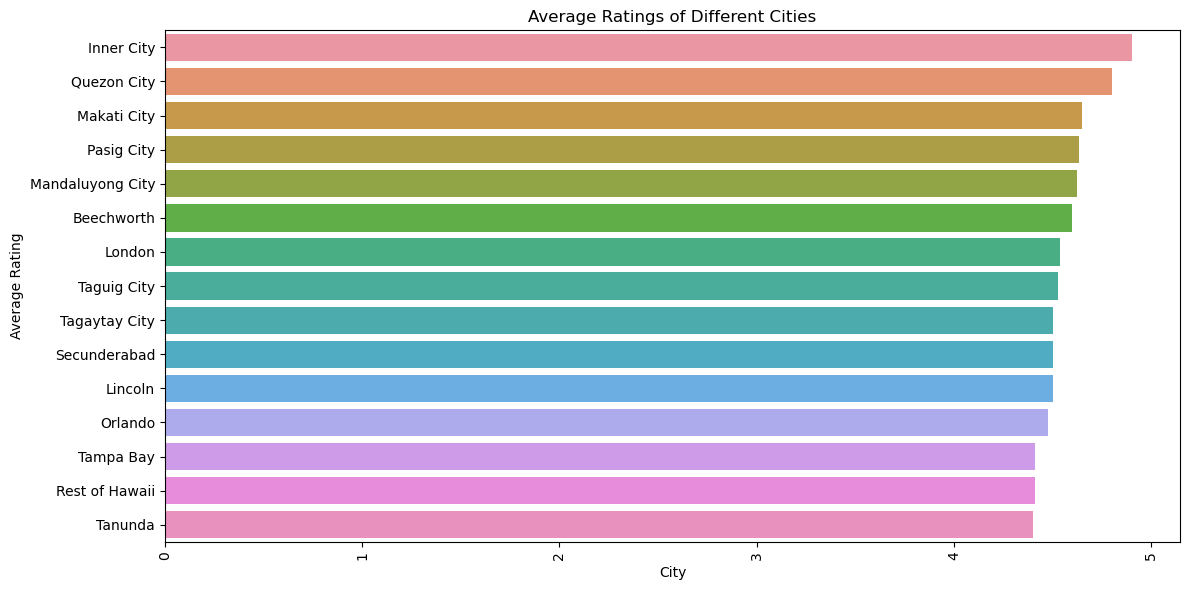

In [56]:
# Comparing average ratings of different cities
avg_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x = avg_ratings.values[:15], y = avg_ratings.index[:15], ci=None)
plt.title('Average Ratings of Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

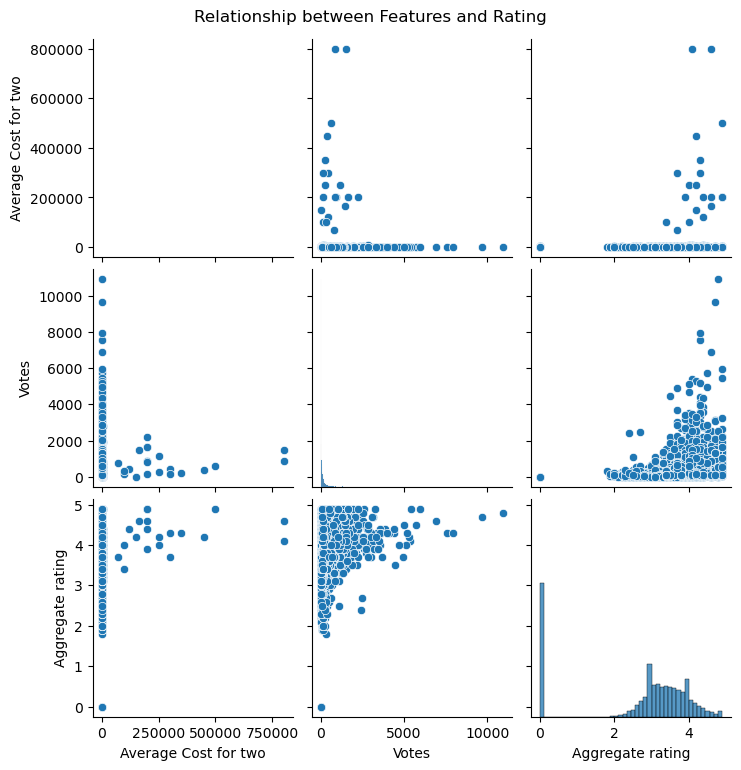

In [58]:
#Relationship between various features and the target to gain insights
# Scatter plot between two continuous variables
sns.pairplot(df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle('Relationship between Features and Rating', y=1.02)
plt.show()

Insights: 
    
    Restaurants ratings distribution is negatively skewed.
    
    Based on highest rating Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are the most popular cuisines and Inner City, Quezon City, Makati City are the most popular cities.
    
    Votes and Restaurants ratings are positively correlated.